In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')  # to avoid encoding error, use unicode_escape
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.shape   # total rows and columns

(11251, 15)

## Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# drop unrelated/blank columns
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [8]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
# check is null values present in dataset
pd.isnull(data)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
pd.isna(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
data.shape

(11251, 13)

In [14]:
# drop null values
data.dropna(inplace=True)

In [15]:
data.shape

(11239, 13)

In [16]:
pd.isna(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

##### change data type of columns

In [17]:
# Amount column have float data type we change it to whole number i.e int
data['Amount'] = data['Amount'].astype('int')

In [18]:
data['Amount'].dtype

dtype('int32')

In [19]:
# check avaiable columns in dataset
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
len(data.columns)

13

In [22]:
# rename any column   # change 'Marital_Status' column name to 'Shaadi'
data.rename(columns={'Marital_Status':'Shaadi'})  # tis temporary rename column

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [24]:
data.head() 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [25]:
# discribe() method returns description of the data in the DataFrame (i.e, count,mean,std, etc)
data.describe()  #it takes only number columns 

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [28]:
# Use Describe() for specified columns
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis [EDA]

### Gender

In [29]:
data.Gender

0        F
1        F
2        F
3        M
4        M
        ..
11246    M
11247    M
11248    F
11249    M
11250    F
Name: Gender, Length: 11239, dtype: object

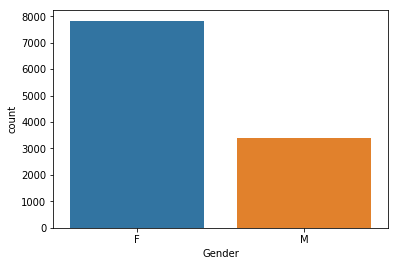

In [30]:
sns.countplot(x='Gender',data=data)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

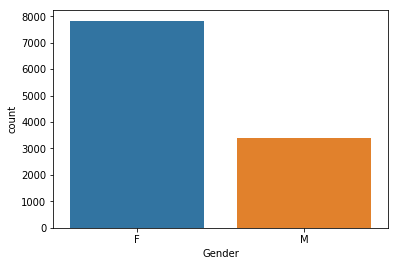

In [36]:
ax = sns.countplot(x='Gender',data=data)

for bars in ax.containers:
    ax.bar_label(bars)

as plot shows female purchases more stuff as compare to male

In [37]:
data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


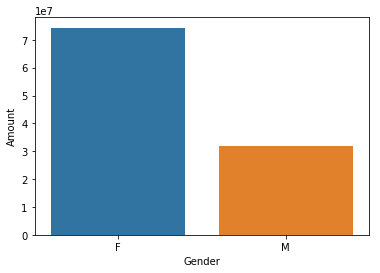

In [39]:
sales_gen = data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x= 'Gender', y='Amount', data= sales_gen)

##### For the above graphs we can see that most the buyers are females and even the purchasing power of females are greter than men

## Age

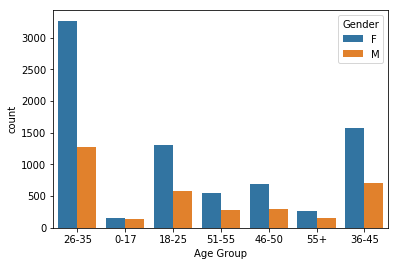

In [44]:
ax = sns.countplot(data=data,x='Age Group',hue='Gender')

TypeError: 'list' object is not callable

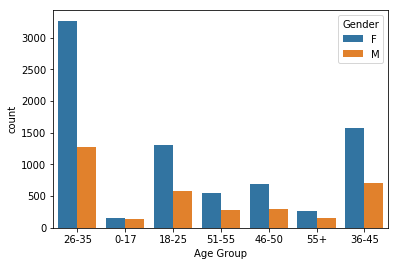

In [45]:
ax = sns.countplot(data=data,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)    

Most shopping male and female age count in 26 to 35 age group

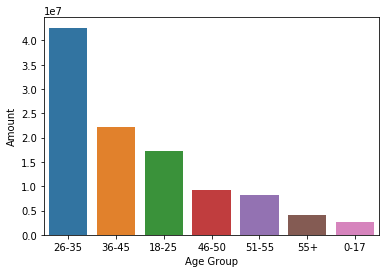

In [47]:
# Total amount vs age group
Sales_Age = data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x= 'Age Group',y='Amount',data=Sales_Age)

##### from above graph we can see that most of the buyers are of age group between 26-35 yers female

## State

In [49]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [50]:
data.State

0           Maharashtra
1        Andhra Pradesh
2         Uttar Pradesh
3             Karnataka
4               Gujarat
              ...      
11246       Maharashtra
11247           Haryana
11248    Madhya Pradesh
11249         Karnataka
11250       Maharashtra
Name: State, Length: 11239, dtype: object

find total number of orders from top 10 states

In [52]:
select_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
select_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


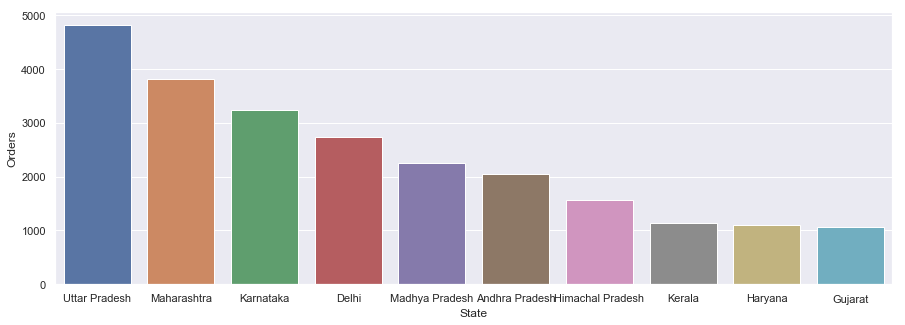

In [55]:
select_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=select_state,x='State',y='Orders')

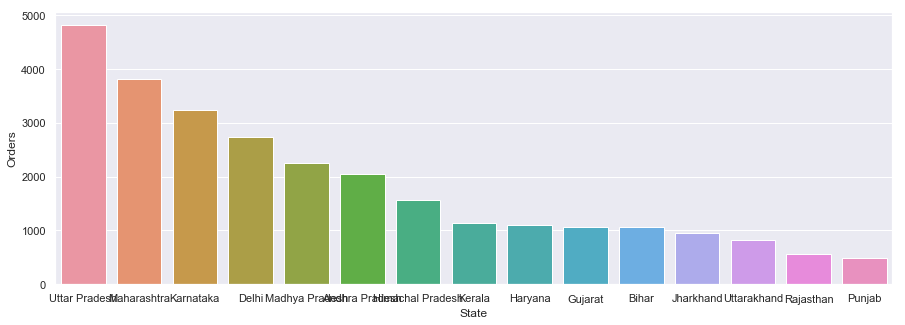

In [56]:
select_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(15)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=select_state,x='State',y='Orders')

find total number of Amount from top 10 states

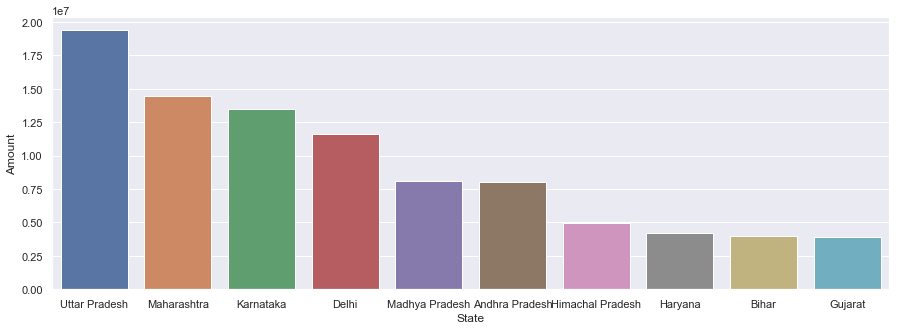

In [59]:
select_state = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=select_state,x='State',y='Amount')

##### from above graph we can see that inexpectedly most of the orders from Utter Pradesh, Maharashtra and Karnataka respectivly but total sales/amount is from UP, Karnataka and Maharashtra  

## Marital Status

In [60]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

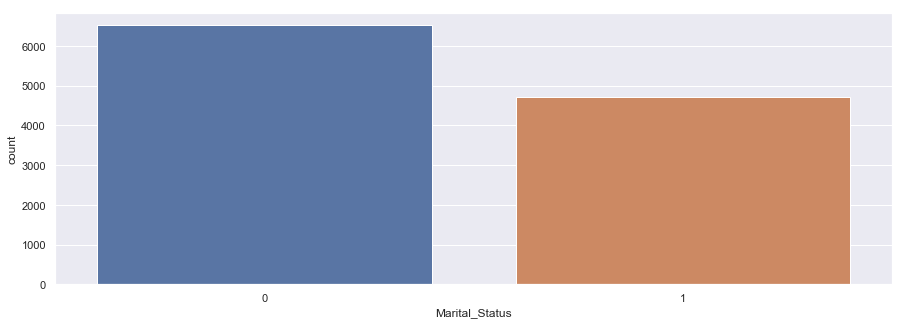

In [61]:
ax = sns.countplot(data=data,x='Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

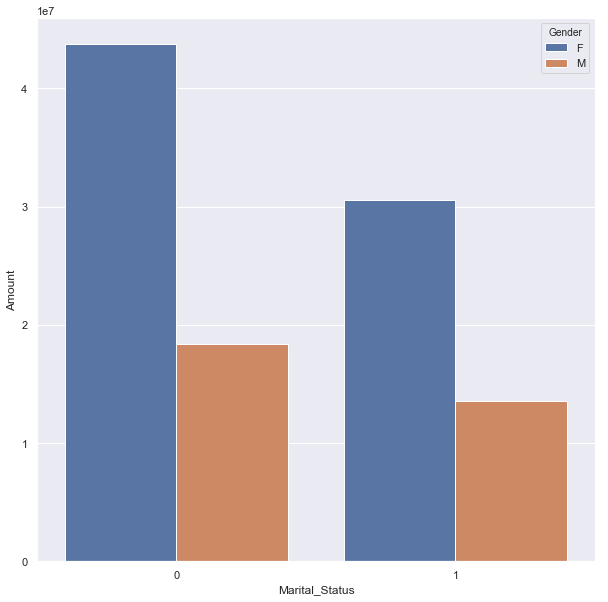

In [64]:
select_sales = data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=select_sales,x='Marital_Status',y='Amount',hue='Gender')

from above graphs we can see that most of the buyers are married(women) and they have high perchasing power

## Occupation

In [65]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

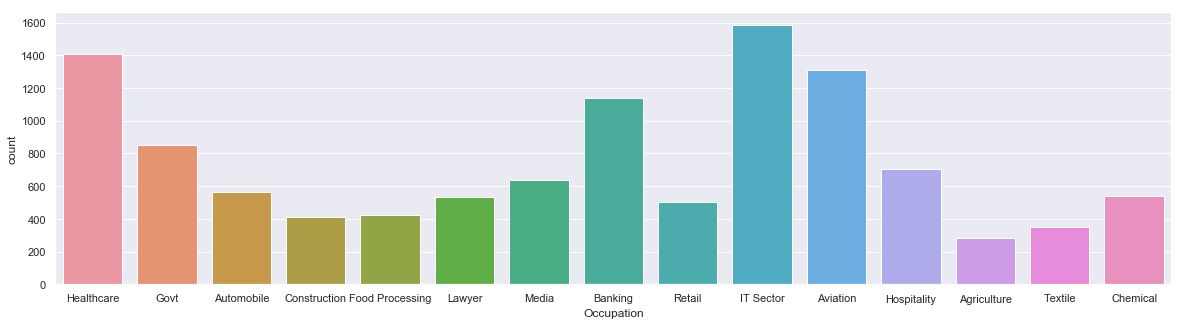

In [67]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

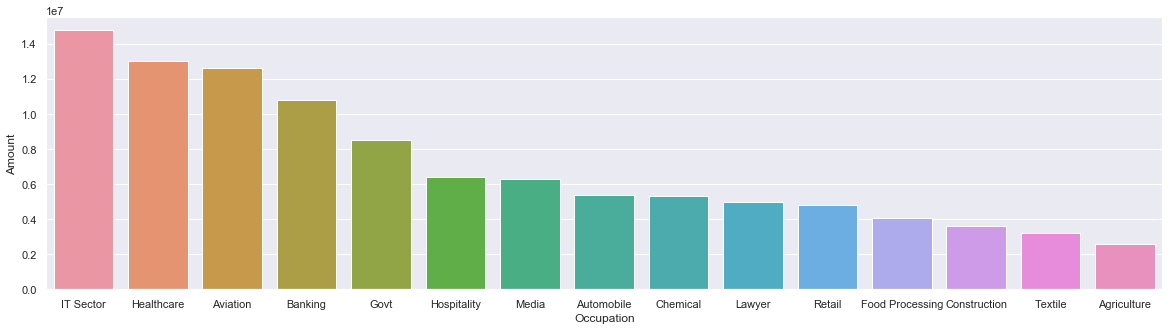

In [69]:
sales_state = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

##### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

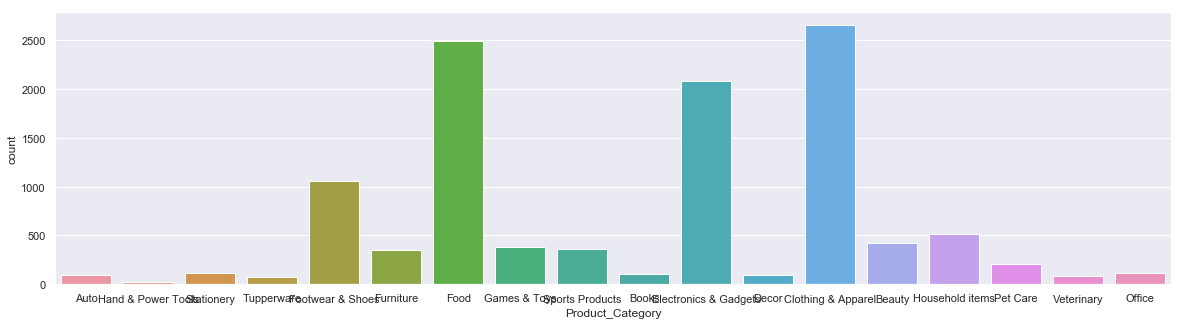

In [70]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

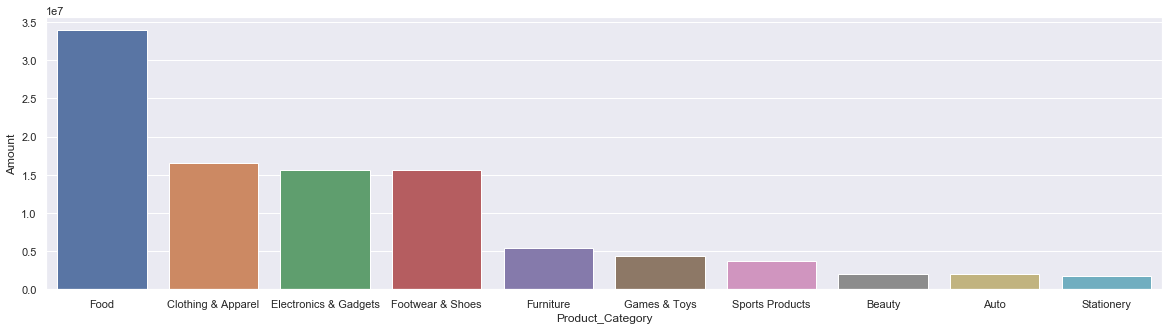

In [71]:
sales_state = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

##### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

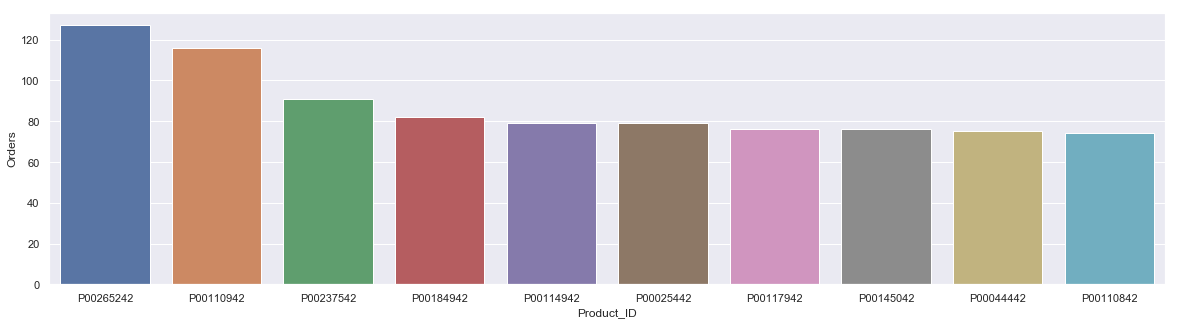

In [73]:
sales_state = data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

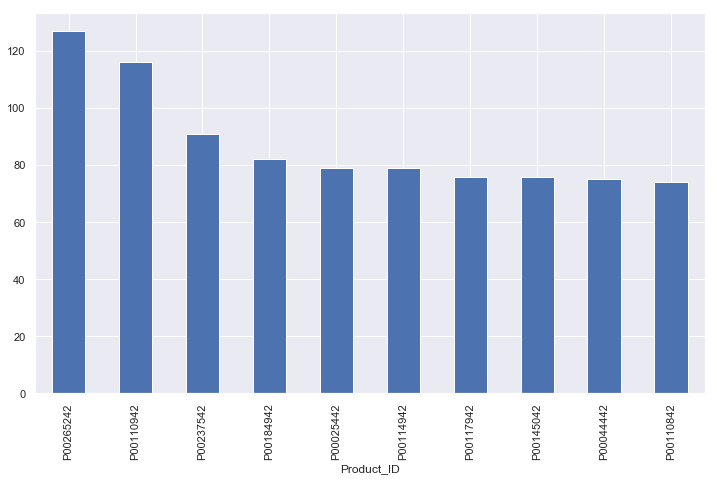

In [74]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category